<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-7-Wander03/blob/main/DATA_301_Lab_7_Phase_2_Andrew_Kerr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression Using Clustering

Let's learn how to use clustering to compress images. Each image consists of $n$ pixels, where $n$ is a large number. Each pixel contains a value between 0-255 for each of the 3 color channels: red, blue, and green (RGB). Each of these numbers can be represented using $\log_2 256 = 8$ bits, so it takes $24$ bits to represent each pixel and $24 n$ bits to represent the entire image. 

Now, suppose we treat each of the $n$ pixels as a 3-dimensional point (the three values R, G, and B), and we cluster these $n$ points into $k$ clusters, where $k$ is much smaller than $n$. Since each point should be close to the center of the cluster, we can replace the color of each pixel by the color of its cluster centroid. Now we only have to store which cluster each pixel belongs to, which requires $n \log_2 k$ bits, plus a codebook that maps each of the $k$ centroids to RGB values, which requires $ 24 k$ bits. So in total, we have reduced the size of the image from:

$$ 24 n \longrightarrow n \log_2 k + 24 k. $$

The code below reads in a 128 x 128 image of a baboon. So in this case, $n = 128 \times 128 = 16384$. We will cluster these $16384$ observations into just $k=16$ clusters. So we will compress the image from $24 \cdot 16384 = 393216$ bits to $16384 \log_2 16 + 24 \cdot 16 = 65920$ bits, by a factor of 6. This technique of using clustering to compress data is known as **vector quantization**.

Some code to read in and display an image is provided below. In the code below, `image` is a 16384 x 3 array of integer values. Each row represents the R, G, and B intensities of one of the pixels in a 128 x 128 image. To view the image, we have to first reshape the data to be 3-dimensional (128 x 128 x 3) and then call the function `plt.imshow()`.

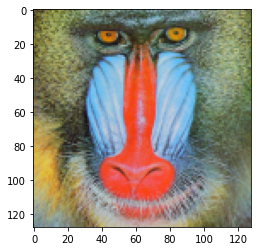

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

image_df = pd.read_table("https://dlsun.github.io/pods/data/mandrill.rgb", 
                         sep=" ", header=None, names=["r", "g", "b"])
image_array = image_df.values.astype("uint8")
plt.imshow(np.reshape(image_array, (128, 128, 3)))

Now let's compress the image. The 16384 pixels contain over 16000 distinct colors. We'll reduce the number of colors to just 16. To do this, we will cluster the 16384 RGB values into $k=16$ clusters using $k$-means clustering. The centroid of each cluster will be a color that should be "close" to the color of the pixels in the cluster. Thus, we can replace the color of each pixel by the color of the cluster centroid.

Run $k$-means clustering. Note that you should be applying $k$-means clustering to the original (16384, 3) 2D array, and not the reshaped 3D array. Then, view the compressed image. Since your cluster centroids will be floats, not integers, you may have to cast the RGB values of the centroids to integers using `.astype("uint8")`. You will also have to reshape the image. The image should look similar to the original image, but less crisp. If the colors are seriously distorted, then check your work; chances are that you did something wrong.

In [2]:
def cent(n):
  return centroids[n].tolist()

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import make_column_selector, make_column_transformer
from pandas.core.common import pipe

X_train = image_df

model = KMeans(n_clusters=16)
model.fit(X_train)

centroids = model.cluster_centers_

clusters = pd.Series(model.labels_).map(cent)

In [7]:
df_cluster = pd.DataFrame(clusters)
df_cluster[['r','g', 'b']] = pd.DataFrame(df_cluster[0].tolist(), index= df_cluster[0].index)
df_cluster.drop(df_cluster.columns[[0]], axis=1, inplace=True)

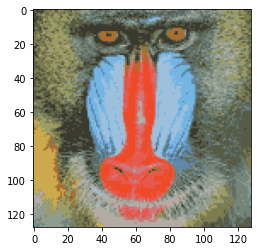

In [8]:
image_array = df_cluster.values.astype("uint8")
plt.imshow(np.reshape(image_array, (128, 128, 3)))

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 7 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.